In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Embedding, GlobalMaxPooling1D, Dropout, Bidirectional, LSTM
import feature_builder
import util

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
def prepare_for_cnn(df):
    processed = feature_builder.process_dataset(df)
    return (processed, processed.to_numpy().reshape(processed.shape[0], 1, processed.shape[1]))

In [4]:
processed, X_train = prepare_for_cnn(train_df)
y_train = train_df['target'].values

Percentage of words covered in the embeddings = 0.6336399642263958


In [5]:
processed

,invalid_location_character_count,keyword_length,text_length,location_length,stop_word_count,punctuation_count,hashtag_count,mention_count,char_count,exclamation_count,...,text_embedding_290,text_embedding_291,text_embedding_292,text_embedding_293,text_embedding_294,text_embedding_295,text_embedding_296,text_embedding_297,text_embedding_298,text_embedding_299
0,0,11,69,0,6,1,1,0,69,0,...,-0.055542,0.115112,-0.114197,-0.073990,-0.028381,0.010828,-0.061638,-0.080215,-0.020348,0.119019
1,0,11,38,0,0,1,0,0,38,0,...,-0.059473,-0.018774,-0.040625,0.167126,0.067529,0.010791,-0.139258,-0.042334,0.070020,0.054913
2,0,11,133,0,11,3,0,0,133,0,...,-0.068675,-0.000366,-0.106979,-0.019196,0.020692,0.031937,-0.069041,0.020345,0.021281,-0.016398
3,0,11,65,0,1,2,1,0,65,0,...,0.208557,-0.069417,-0.071248,0.039714,0.195394,0.079915,-0.236613,0.025553,-0.026367,-0.033366
4,0,11,88,0,7,2,2,0,88,0,...,0.080957,-0.128174,-0.070508,0.061353,0.019550,-0.023505,0.016354,-0.053082,0.030786,0.031708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,11,83,0,2,5,0,0,83,0,...,-0.127472,0.016769,-0.119431,-0.029610,0.010361,-0.045746,-0.038895,-0.090240,-0.001657,-0.127274
7609,0,11,125,0,9,5,0,2,125,0,...,0.004173,0.020516,-0.027425,0.006314,0.001776,-0.016901,-0.112602,-0.011907,0.046770,-0.023856
7610,0,11,65,0,2,11,0,0,65,0,...,0.174235,0.122884,-0.046224,0.060221,-0.155924,-0.039388,-0.201172,0.010946,0.118978,0.344401
7611,0,11,137,0,5,5,0,0,137,0,...,0.090700,0.071742,-0.048296,0.061262,-0.116019,-0.001737,-0.046749,-0.062116,0.018721,-0.048802


In [6]:
def RNN():
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
        Bidirectional(LSTM(64)),
        #Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    return model

Compilo ni modelo

In [7]:
model = RNN()
model.summary()
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 256)            458752    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 623,233
Trainable params: 623,233
Non-trainable params: 0
_________________________________________________________________


Entrenamos

Epoch 1/50
191/191 [==============================] - 2s 12ms/step - loss: 0.6654 - accuracy: 0.5793 - val_loss: 0.6356 - val_accuracy: 0.5345
Epoch 2/50
191/191 [==============================] - 1s 6ms/step - loss: 0.6293 - accuracy: 0.5841 - val_loss: 0.6130 - val_accuracy: 0.5437
Epoch 3/50
191/191 [==============================] - 1s 6ms/step - loss: 0.6012 - accuracy: 0.6207 - val_loss: 0.6177 - val_accuracy: 0.5496
Epoch 4/50
191/191 [==============================] - 1s 5ms/step - loss: 0.5756 - accuracy: 0.6711 - val_loss: 0.5586 - val_accuracy: 0.6586
Epoch 5/50
191/191 [==============================] - 1s 5ms/step - loss: 0.5433 - accuracy: 0.7122 - val_loss: 0.5180 - val_accuracy: 0.7347
Epoch 6/50
191/191 [==============================] - 1s 5ms/step - loss: 0.5209 - accuracy: 0.7373 - val_loss: 0.4914 - val_accuracy: 0.7610
Epoch 7/50
191/191 [==============================] - 1s 6ms/step - loss: 0.4982 - accuracy: 0.7552 - val_loss: 0.4873 - val_accuracy: 0.7466
Epoch

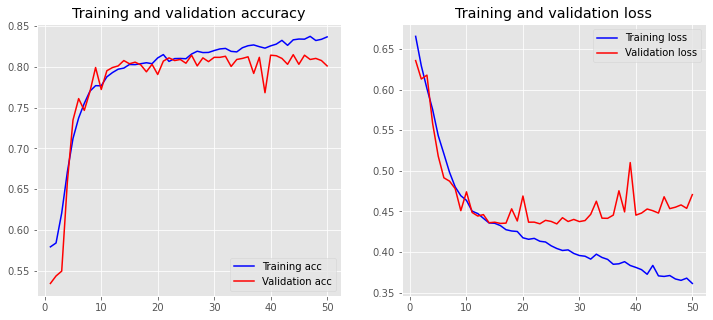

In [8]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
history = model.fit(X_train, y_train, epochs=50, shuffle=True, validation_split=0.2)#, callbacks=[es])
util.plot_history(history)

In [9]:
ids = test_df['id']

processed, final_test = prepare_for_cnn(test_df)
prediction = model.predict_classes(final_test)

final_df = pd.DataFrame({'target': [x[0] for x in prediction]}, index=ids)
final_df

Percentage of words covered in the embeddings = 0.6973331905322909
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,target
id,
0,0
2,0
3,1
9,1
11,1
...,...
10861,0
10865,1
10868,1


In [10]:
final_df.to_csv('lstm.csv')